In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import tensorflow as tf


C:\Users\Mallika Yeturi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
mydata=pd.read_csv(r'C:\Users\Mallika Yeturi\Downloads\Signal.csv')
mydata.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
mydata.shape

(1599, 12)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
null_counts = mydata.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


In [7]:
mydata.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


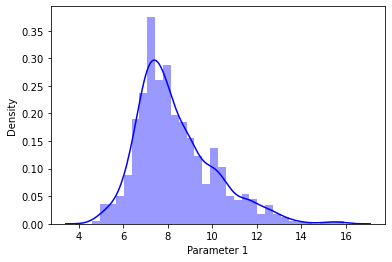

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


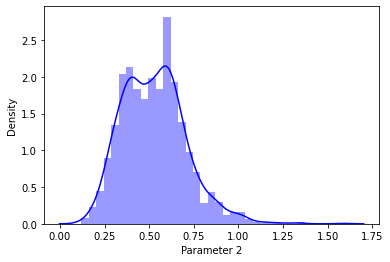

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


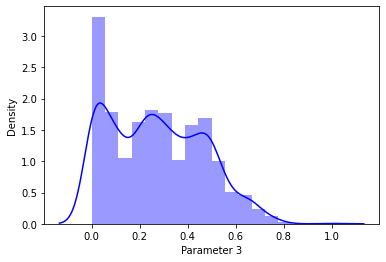

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


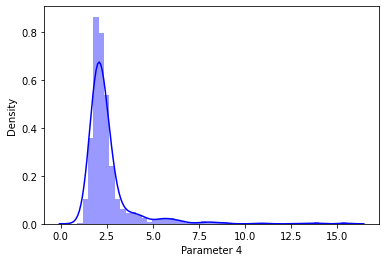

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


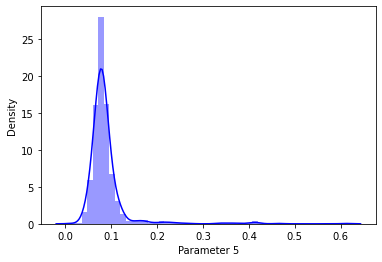

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


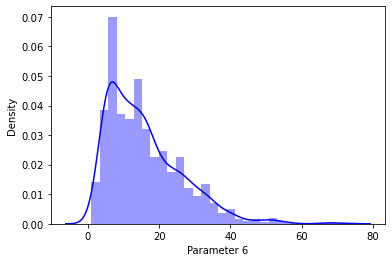

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


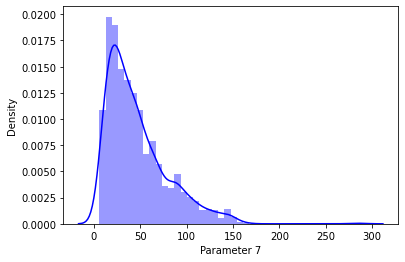

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


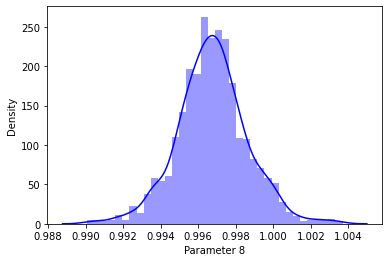

Distribution of  Parameter 8
Mean is: 0.9967466791744831
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425559
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


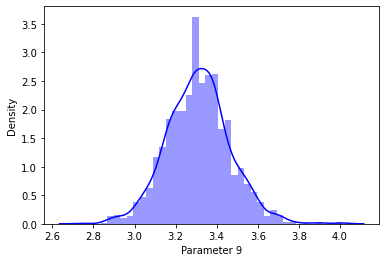

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


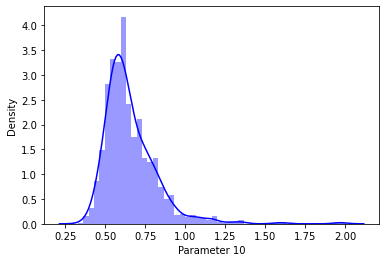

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


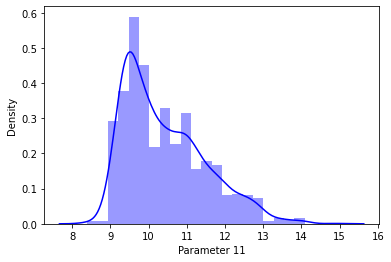

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


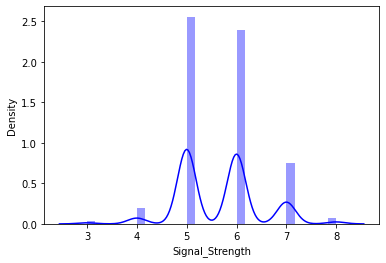

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [8]:
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

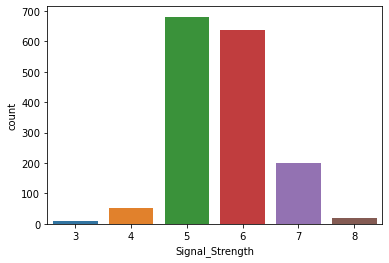

In [9]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

In [1]:
sns.pairplot(mydata,diag_kind='kde')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

In [ ]:
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [ ]:
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df

In [ ]:
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

In [ ]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [16]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [21]:
X_vtrain.shape

(1119, 11)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [23]:
X_train.shape

(895, 11)

In [26]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [27]:
model_reg.compile(optimizer='sgd', loss='mse')

In [28]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 2s 11ms/step - loss: 3.7451 - val_loss: 6.6904
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.8154 - val_loss: 1.0802
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6069
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 0.5481 - val_loss: 0.4541
Epoch 5/100
90/90 [==============================] - 1s 7ms/step - loss: 0.4945 - val_loss: 0.4255
Epoch 6/100
90/90 [==============================] - 1s 8ms/step - loss: 0.4925 - val_loss: 0.4209
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 0.4768 - val_loss: 0.3961
Epoch 8/100
90/90 [==============================] - 0s 4ms/step - loss: 0.4662 - val_loss: 0.4197
Epoch 9/100
90/90 [==============================] - 0s 5ms/step - loss: 0.4537 - val_loss: 0.3764
Epoch 10/100
90/90 [==============================] - 1s 7ms/step - loss: 0.4452 - val_loss: 0.3653
Epoch 11

In [29]:
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [30]:
model_rr = load_model('model_reg.h5')

In [31]:
# Save the Modle to file in the current working directory

#Pkl_Filename = "Pickle_RR_Model.pkl"  
#with open(Pkl_Filename, 'wb') as file:  
#    pickle.dump(model_reg, file)

In [32]:
# Load the Model back from file

#with open(Pkl_Filename, 'rb') as file:  
#    Pickled_RR_Model = pickle.load(file)

#Pickled_RR_Model


In [33]:
y_pred = model_rr.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [34]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.758101]
[5.797392]
[6.0029435]
[5.43006]
[6.013795]


In [35]:
print(y_test.head())

1526    6.0
674     6.0
1508    6.0
58      5.0
1351    6.0
Name: Signal_Strength, dtype: float64


In [36]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.3251051080364312


In [37]:
#summary of regression model
model_rr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


In [38]:
# counting the number of classes in output
mydata['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

In [39]:
X.shape

(1599, 11)

In [40]:
y.shape


(1599,)

In [41]:
yc = to_categorical(y, num_classes=8)

In [42]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)

In [43]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 1.]


In [44]:
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)

In [45]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (895, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [46]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [47]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
45/45 [==============================] - 2s 23ms/step - loss: 1.6100 - accuracy: 0.4056 - val_loss: 1.0997 - val_accuracy: 0.5179
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 1.2088 - accuracy: 0.4246 - val_loss: 1.0394 - val_accuracy: 0.5179
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 1.1950 - accuracy: 0.4547 - val_loss: 1.1178 - val_accuracy: 0.3571
Epoch 4/100
45/45 [==============================] - 0s 9ms/step - loss: 1.1894 - accuracy: 0.4391 - val_loss: 1.0377 - val_accuracy: 0.5089
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 1.1759 - accuracy: 0.4492 - val_loss: 1.0264 - val_accuracy: 0.5089
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 1.1664 - accuracy: 0.4369 - val_loss: 1.0528 - val_accuracy: 0.4821
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 1.1667 - accuracy: 0.4402 - val_loss: 1.0375 - val_accuracy: 0.5223
Epoch 8/100


In [48]:
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [49]:
model_cl = load_model('model_class.h5')

In [50]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.0757945775985718, 0.5005586743354797]


In [51]:
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.082662582397461, 0.5166666507720947]


In [52]:
model_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 8)                 96        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
Total params: 300 (1.17 KB)
Trainable params: 300 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


we can observe the following insights about the performance of the original and new models:

Test Loss:

Original Model: Test Loss = 0.3959
New Model: Test Loss = 0.4961
Insight: The original model has a lower test loss compared to the new model. This indicates that the original model is better at making more accurate predictions on unseen data. A lower test loss indicates better performance in regression tasks.

Test Mean Absolute Error (MAE):

Original Model: Test MAE = 0.4792
New Model: Test MAE = 0.4939
Insight: The original model has a slightly lower test MAE compared to the new model. MAE represents the average absolute difference between the predicted and actual values. A lower MAE implies better accuracy in predictions.

Performance Comparison:

The original model outperforms the new model in terms of both test loss and test MAE.
The difference in performance between the two models is relatively small, indicating that the new model is not significantly worse than the original model.
Model Complexity:

The new model introduced dropout layers, which are a form of regularization aimed at preventing overfitting. It also used the L2 regularization technique.
The original model does not have these regularization techniques.
Overfitting:

While dropout and L2 regularization were introduced in the new model to mitigate overfitting, the performance difference suggests that the original model might not be overfitting significantly on the given dataset.
Further Exploration:

The difference in performance between the two models suggests that further fine-tuning and experimentation with hyperparameters might be beneficial.
Overall, both models seem to be performing well on the given task, but the original model has a slight edge in terms of accuracy (lower test loss and MAE).